In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [218]:
df = pd.read_csv('./placement.csv')

In [219]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [221]:
df.duplicated().sum() # checking dubplicate entries

0

In [222]:
df.isnull().sum()

,0
Unnamed: 0,0
cgpa,0
iq,0
placement,0


In [223]:
df.shape

(100, 4)

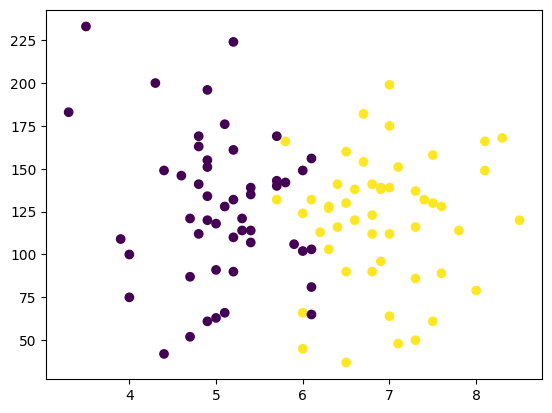

In [224]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [225]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [226]:
X


,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [227]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [230]:
X_train

,Unnamed: 0,cgpa
67,67,5.0
58,58,8.0
52,52,7.0
83,83,7.5
74,74,6.7
...,...,...
35,35,6.8
8,8,6.1
87,87,5.7
0,0,6.8


In [231]:
X_test

,Unnamed: 0,cgpa
15,15,5.1
77,77,7.3
36,36,5.7
46,46,5.3
84,84,5.7
81,81,5.4
86,86,5.1
92,92,5.2
48,48,6.6
94,94,4.7


In [232]:
from sklearn.preprocessing import StandardScaler

In [233]:
scaler = StandardScaler()

In [234]:
X_train = scaler.fit_transform(X_train)

In [235]:
X_train

array([[ 0.67576166, -0.88622084],
       [ 0.36100206,  1.68667838],
       [ 0.15116233,  0.8290453 ],
       [ 1.23533429,  1.25786184],
       [ 0.92057469,  0.57175538],
       [ 0.95554798, -1.05774746],
       [ 1.44517402, -0.97198415],
       [ 0.99052126, -0.97198415],
       [-0.58327674, -1.82961722],
       [-0.89803634, -0.97198415],
       [-0.0936507 , -0.02858777],
       [-1.21279595,  0.31446546],
       [ 1.68998704, -1.40080069],
       [ 1.79490691,  0.14293885],
       [ 0.43094864,  0.743282  ],
       [-0.19857056,  1.34362515],
       [ 1.30528087, -0.20011438],
       [-0.33846372,  0.40022877],
       [ 1.48014731,  1.08633523],
       [-0.12862399,  1.25786184],
       [-0.75814319,  0.8290453 ],
       [-0.26851714, -0.97198415],
       [-1.3526891 , -0.80045754],
       [-0.16359727,  0.65751869],
       [ 0.04624246, -0.54316761],
       [-0.54830345,  0.8290453 ],
       [-1.56252884,  1.17209853],
       [ 0.46592193,  1.08633523],
       [ 0.85062811,

In [236]:
X_test = scaler.transform(X_test)

In [237]:
X_test

array([[-1.14284937, -0.80045754],
       [ 1.02549455,  1.08633523],
       [-0.4084103 , -0.28587769],
       [-0.05867741, -0.62893092],
       [ 1.27030758, -0.28587769],
       [ 1.16538771, -0.54316761],
       [ 1.34025415, -0.80045754],
       [ 1.55009389, -0.71469423],
       [ 0.01126917,  0.48599207],
       [ 1.62004047, -1.14351076]])

In [238]:
from sklearn.linear_model import LogisticRegression

In [239]:
clf = LogisticRegression()

In [240]:
clf.fit(X_train, y_train)

LogisticRegression()

In [241]:
y_pred = clf.predict(X_test)

In [242]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [243]:
y_test

,placement
15,0
77,1
36,0
46,0
84,0
81,0
86,0
92,0
48,1
94,0


In [244]:
from sklearn.metrics import accuracy_score

In [245]:
accuracy_score(y_test,y_pred)

0.9

In [246]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

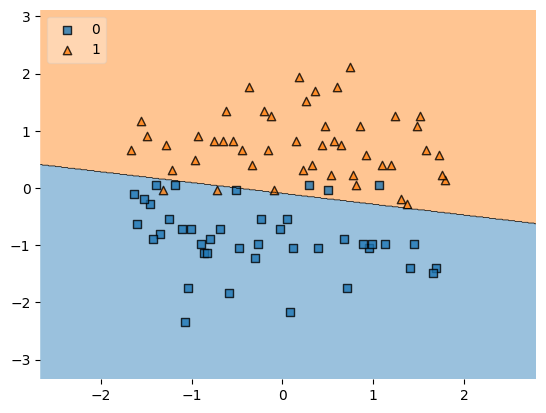

In [247]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [249]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[7 1]
 [0 2]]
